In [1]:
%run __init__.py
%matplotlib inline
#from lib.project_3_functions import fit_benchmark_model

In [2]:
train_data = './data/madelon_train.data.txt'
train_labels = './data/madelon_train_labels.txt'
test_data = './data/madelon_test.data.txt'
test_labels = './data/madelon_test_labels.txt'

madelon_train = pd.read_csv(train_data, sep = ' ', header=None)
madelon_labels_train = pd.read_csv(train_labels, sep = ' ', header=None)
madelon_test = pd.read_csv(test_data, sep = ' ', header=None)
madelon_labels_test = pd.read_csv(test_labels, sep = ' ', header=None)
number = np.random.randint(1,500,90)

In [3]:
madelon_train = madelon_train.drop(500, axis = 1)
madelon_train[500] = madelon_labels_train
madelon_train.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,-1
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,-1
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,-1
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,1
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,1


In [4]:
madelon_test = madelon_test.drop(500, axis = 1)
madelon_test[500] = madelon_labels_test
#madelon_test[500] = madelon_test[500].apply(lambda x: int(x))

In [5]:
madelon_test.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,483,454,513,495,523,469,453,477,506,479,...,480,543,259,413,520,485,498,523,510,-1
1,485,508,493,487,478,472,504,476,479,475,...,480,535,534,514,452,484,495,548,477,-1
2,483,521,507,475,493,486,421,475,496,483,...,476,498,495,508,528,486,465,508,503,-1
3,474,504,576,480,553,483,524,478,483,483,...,475,470,463,509,525,479,467,552,517,1
4,495,474,523,479,495,488,485,476,497,478,...,471,522,343,509,520,475,493,506,491,-1


Make a larger dataset to sample from

In [6]:
Combine =  pd.concat([madelon_train, madelon_test])

In [7]:
Combine.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,-1
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,-1
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,-1
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,1
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,1


In [8]:
Data = Combine.sample(n = 1500, random_state=42)
Data = Data.reset_index(drop = True)

In [9]:
Data.shape

(1500, 501)

In [10]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,476,450,555,468,470,487,506,478,509,477,...,479,511,655,497,541,475,471,488,484,1
1,471,503,545,492,550,485,495,475,469,470,...,482,474,566,483,587,481,476,540,499,-1
2,485,492,456,478,481,479,443,475,471,474,...,479,501,692,446,551,481,480,516,524,-1
3,482,482,515,486,522,477,509,477,480,480,...,481,508,386,483,517,468,486,506,504,-1
4,485,448,568,476,457,481,526,474,493,469,...,480,470,538,439,497,467,521,520,521,-1


In [11]:
Data.describe()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,481.788667,483.452667,509.262000,483.176000,502.390667,479.340667,480.764667,476.573333,486.796000,478.753333,...,478.893333,485.820667,499.483333,493.922667,510.205333,478.255333,483.204667,509.118000,490.489333,-0.006667
std,6.244945,30.542784,37.679896,9.014092,40.874603,6.965220,40.626760,1.384401,15.403135,7.388429,...,4.011402,23.509338,129.253444,35.528405,37.900547,5.799704,13.669260,37.556771,25.294883,1.000311
min,462.000000,381.000000,370.000000,453.000000,378.000000,459.000000,334.000000,471.000000,430.000000,456.000000,...,463.000000,391.000000,103.000000,368.000000,353.000000,458.000000,435.000000,363.000000,407.000000,-1.000000
25%,478.000000,463.000000,484.000000,477.000000,475.000000,475.000000,454.000000,476.000000,477.000000,474.000000,...,476.000000,470.000000,405.000000,471.000000,485.000000,475.000000,474.000000,483.000000,474.000000,-1.000000
50%,482.000000,484.000000,510.000000,483.000000,501.000000,479.000000,481.000000,477.000000,487.000000,479.000000,...,479.000000,486.000000,506.000000,494.000000,510.000000,478.000000,483.000000,509.000000,491.000000,-1.000000
75%,486.000000,504.000000,534.250000,489.000000,527.000000,484.000000,508.000000,477.000000,497.000000,484.000000,...,482.000000,501.000000,587.250000,517.000000,536.000000,482.000000,492.000000,535.000000,507.000000,1.000000
max,500.000000,600.000000,632.000000,510.000000,688.000000,502.000000,611.000000,481.000000,541.000000,505.000000,...,497.000000,564.000000,848.000000,614.000000,661.000000,499.000000,535.000000,633.000000,593.000000,1.000000


In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 501 entries, 0 to 500
dtypes: int64(501)
memory usage: 5.7 MB


In [13]:
Data[500].value_counts()

-1    755
 1    745
Name: 500, dtype: int64

About an even split

### Let's find the non-noise features

In [236]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,476,450,555,468,470,487,506,478,509,477,...,479,511,655,497,541,475,471,488,484,1
1,471,503,545,492,550,485,495,475,469,470,...,482,474,566,483,587,481,476,540,499,-1
2,485,492,456,478,481,479,443,475,471,474,...,479,501,692,446,551,481,480,516,524,-1
3,482,482,515,486,522,477,509,477,480,480,...,481,508,386,483,517,468,486,506,504,-1
4,485,448,568,476,457,481,526,474,493,469,...,480,470,538,439,497,467,521,520,521,-1


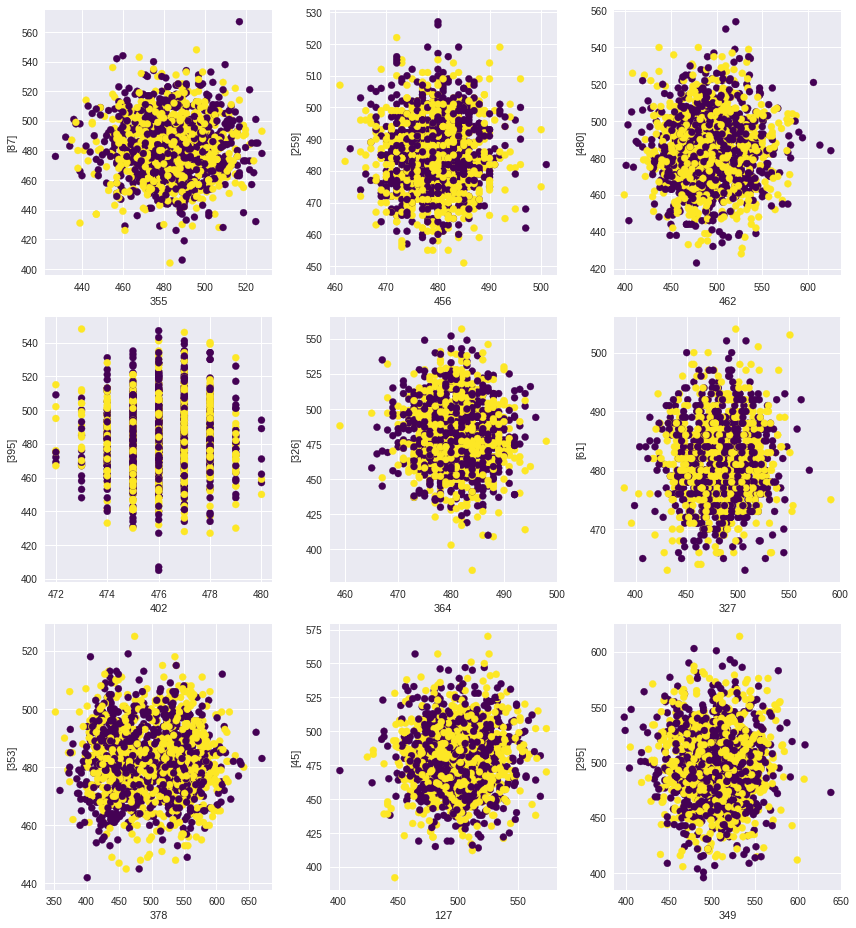

In [15]:
#np.random.seed(42)
#number = np.random.randint(1,500,90)
fig = plt.figure(figsize = (12,13))
j = 0

for i in number[:9]:
    j += 1
    fig.add_subplot(3,3,j)
    n = np.random.randint(1,500,1)
    plt.scatter(Data[i], Data[n], c=Data[500], cmap = 'viridis')
    plt.xlabel(i)
    plt.ylabel(n)
    plt.savefig('EDA1')
    
plt.tight_layout()

Using the r2 score method 

In [16]:
def calculate_r_2_for_feature(data, feature, model):
    new_data = data.drop(feature, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(new_data,data[feature],test_size=0.25, random_state = 42)

    scaler = StandardScaler()
    scaler.fit(X_train, y_train)
    X_tr_sc = scaler.transform(X_train, y_train)
    X_ts_sc = scaler.transform(X_test, y_test)
    
    regressor = model()
    regressor.fit(X_train, y_train)

    score = regressor.score(X_test, y_test)
    return score

In [17]:
scores = []

for i in range(Data.shape[1] - 1):
    scores.append(calculate_r_2_for_feature(Data.drop(500, axis = 1), Data.columns[i], KNeighborsRegressor))

In [18]:
R2_scores = list(zip(Data.columns, scores))

In [242]:
FS = pd.DataFrame(R2_scores)
Important = FS[FS[1] > .01]

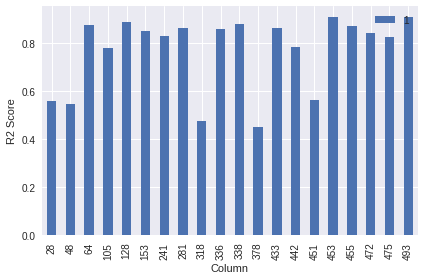

In [243]:
#Important = Important.sort_values(by = 1)
Important.plot.bar(x = Important.index, y = 1)
plt.ylabel('R2 Score')
plt.xlabel('Column')
plt.tight_layout()
plt.savefig("Salient features")

20 important features

In [244]:
Important = Important.drop(0, axis = 1)

In [245]:
Important.shape

(20, 1)

In [246]:
Important

,1
28,0.557814
48,0.546192
64,0.875443
105,0.780894
128,0.888150
153,0.852192
241,0.830692
281,0.863058
318,0.473473
336,0.858072


Our important features are: 28,  48,  64, 105, 128, 153, 241, 281, 318, 336, 338, 378, 433,
       442, 451, 453, 455, 472, 475, 493

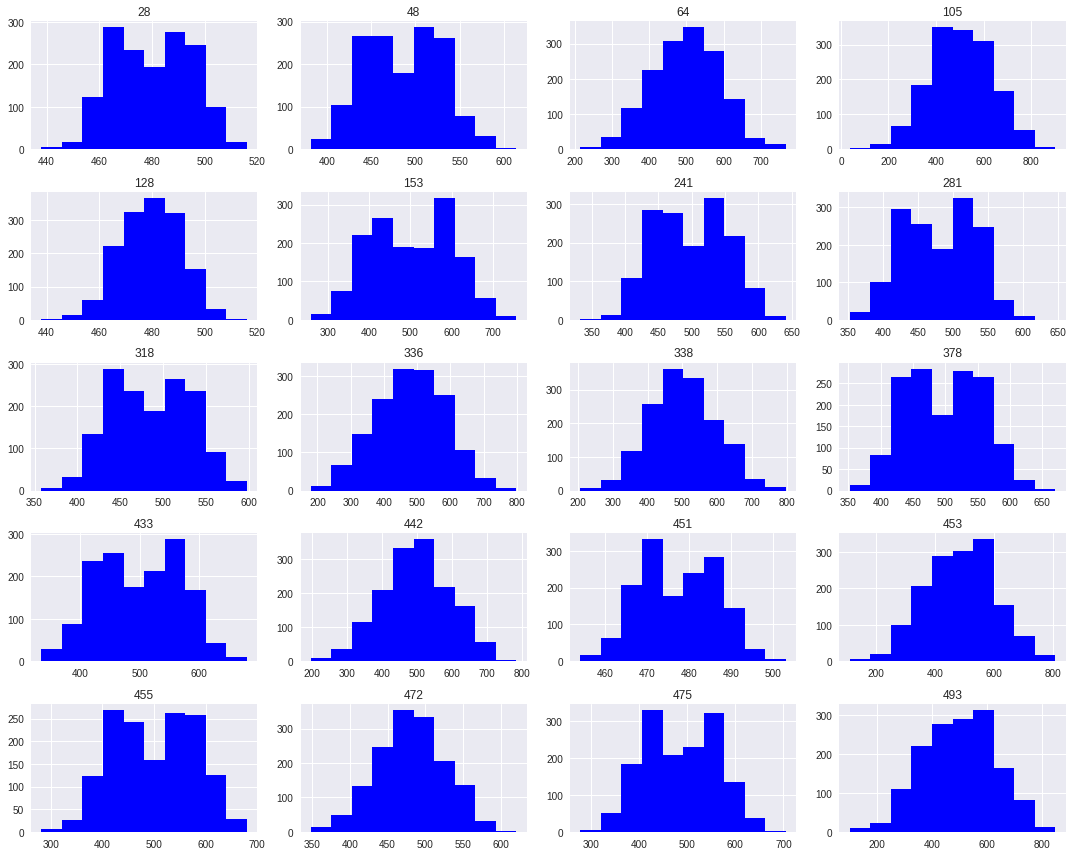

In [249]:
fig = plt.figure(figsize = (15,12))
j = 0

for i in Important.index:
    j += 1
    fig.add_subplot(5,4,j)
    plt.hist(Data[i], color= 'b') #'b', 'r', 'y', 'k', 'w'
    plt.title(i)
    plt.savefig("UCIFIG")
    
plt.tight_layout()

In [139]:
Imp = np.sort(Important.index)
X = Data[Imp]
y = Data[500]

In [140]:
Important.index 


Int64Index([ 28,  48,  64, 105, 128, 153, 241, 281, 318, 336, 338, 378, 433,
            442, 451, 453, 455, 472, 475, 493],
           dtype='int64')

In [250]:
X.head()

,0,1,2,3,4
0,-1.832138,-0.817647,4.566167,-0.506534,0.592264
1,-1.279373,0.695152,2.973141,-5.168515,-2.347545
2,2.147662,-2.082025,0.714422,-2.032854,1.741621
3,-2.017634,1.477426,-1.931030,1.893365,0.460793
4,0.892869,-0.296088,0.131960,-2.415414,-0.239747


In [142]:
cor = X.corr()

In [143]:
cor.head()

,28,48,64,105,128,153,241,281,318,336,338,378,433,442,451,453,455,472,475,493
28,1.000000,-0.010441,-0.034660,0.374503,0.379705,-0.044321,0.000615,-0.042202,0.989976,-0.029332,-0.331377,-0.006216,-0.041790,-0.640644,0.989293,-0.206440,0.012336,-0.640270,0.005905,-0.204638
48,-0.010441,1.000000,0.167955,0.474389,0.474183,0.080301,0.019715,0.089956,-0.008352,0.163534,-0.149173,0.988268,0.081671,-0.151820,-0.006275,0.174063,0.020817,-0.149817,0.027441,0.177583
64,-0.034660,0.167955,1.000000,-0.553878,-0.554185,0.280491,-0.732140,0.279561,-0.034105,0.990468,0.433454,0.171391,0.282107,0.012576,-0.036517,0.118679,0.609504,0.015032,-0.725168,0.121972
105,0.374503,0.474389,-0.553878,1.000000,0.989825,0.149588,0.326487,0.158618,0.375092,-0.554404,-0.681351,0.473131,0.149946,-0.227099,0.374317,0.387402,-0.683828,-0.225947,0.328258,0.387908
128,0.379705,0.474183,-0.554185,0.989825,1.000000,0.147966,0.329007,0.156817,0.380125,-0.554564,-0.682985,0.473245,0.148819,-0.232817,0.380093,0.381531,-0.679306,-0.232224,0.331995,0.381593


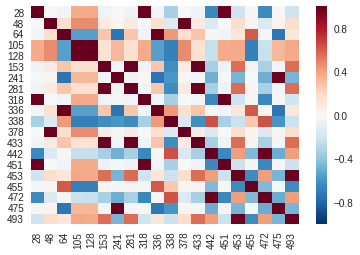

In [144]:
sns.heatmap(cor)

In [145]:
def fit_benchmark_model(X, y, model, name):
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    #scale the data
    scaler = StandardScaler()
    # Fit_transform
    X_train_scaled = scaler.fit_transform(X_train)
    # transform
    X_test_scaled = scaler.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    return (name, model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))

In [146]:
fit_benchmark_model(X, y, LogisticRegression(C = 100), 'Logistic Regression')

('Logistic Regression', 0.61066666666666669, 0.62133333333333329)

In [147]:
fit_benchmark_model(X, y, KNeighborsClassifier(), 'KNN')

('KNN', 0.93422222222222218, 0.85333333333333339)

In [148]:
fit_benchmark_model(X, y, DecisionTreeClassifier(), 'Decision tree')

('Decision tree', 1.0, 0.74399999999999999)

### Pre-Process

In [149]:
ss = StandardScaler()

In [170]:
X_box_cox = pd.DataFrame()
for col in X.columns:
    box_cox_trans = st.boxcox(X[col])[0]
    X_box_cox[col] = pd.Series(box_cox_trans)

In [174]:
ss.fit(X_box_cox)
X_box_cox_sc = ss.transform(X_box_cox)
X_box_cox_df = pd.DataFrame(X_box_cox_sc, columns=X.columns)
X_box_cox.head()

,28,48,64,105,128,153,241,281,318,336,338,378,433,442,451,453,455,472,475,493
0,119.926812,81.336132,471.880684,768.608957,230460.557230,249.405303,127.370861,342.203305,98.795789,407.074934,257.258684,85.822394,401.098947,1411.266856,8.700719,775.362319,245.319847,2216.813010,139.547908,721.190109
1,124.489193,91.984020,597.554126,874.340983,241699.603677,164.604538,115.226431,277.149946,111.155540,515.083080,297.142235,102.449350,311.486248,1292.416700,8.766131,696.753717,274.940202,2164.028208,121.552277,621.445259
2,126.372206,81.449643,565.683759,906.899749,241699.603677,310.891017,123.111008,391.867371,116.211218,492.724182,204.398127,86.302573,473.687603,974.366550,8.790162,832.146735,275.610641,1774.208421,132.947734,762.730059
3,121.835365,78.354278,708.331451,348.869645,206917.449904,283.377972,129.290302,375.597244,103.144379,644.996729,253.293554,81.806567,451.851239,926.041090,8.729579,483.945944,433.704701,1728.303049,142.025627,420.622342
4,126.184367,85.702361,644.165705,841.843608,235534.186786,262.144757,122.330835,355.579955,114.230882,555.156137,237.324354,92.193911,419.490264,978.773403,8.774171,685.754060,320.278523,1788.026324,132.259108,590.120556


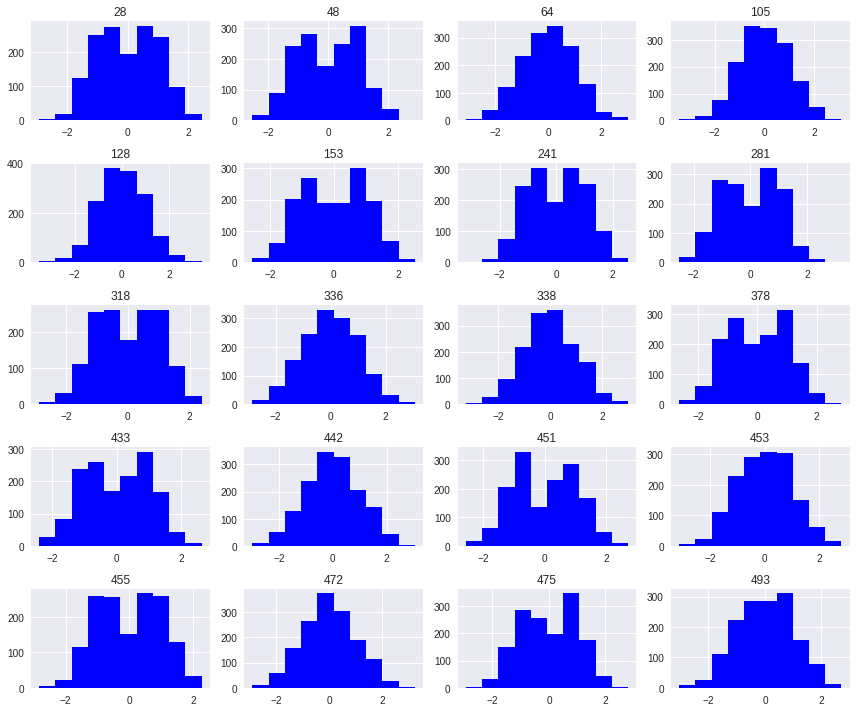

In [251]:
fig = plt.figure(figsize = (12,10))
j = 0

for i in Important.index:
    j += 1
    fig.add_subplot(5,4,j)
    plt.hist(X_box_cox_df[i], color= 'b') #'b', 'r', 'y', 'k', 'w'
    plt.title(i)
    plt.savefig("UCIBOX")
    
plt.tight_layout()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

skb = SelectKBest(k=5)

skb.fit(X_train,y_train)

In [ ]:
skb.pvalues_


In [ ]:
mask = skb.get_support()

In [153]:
skb_feats = np.where(skb.get_support())[0]
skb_feats

array([ 2,  3,  5, 10, 12])

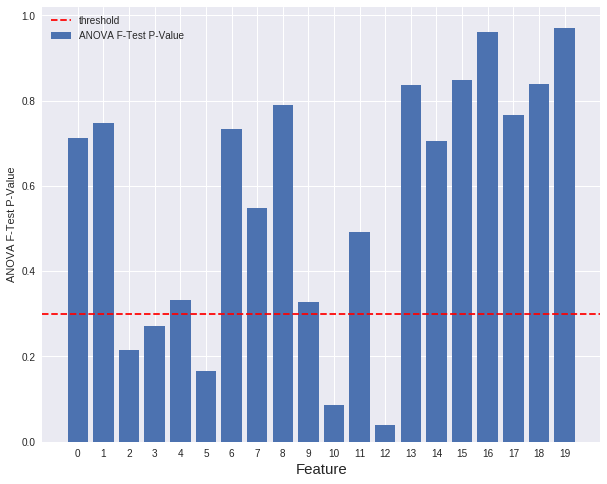

In [254]:
pvals = list(skb.pvalues_)
pvals.sort()
line_loc = np.mean(pvals[4:6])

plt.figure(figsize=(10,8))
plt.bar(range(0,20), skb.pvalues_, label = 'ANOVA F-Test P-Value')
plt.axhline(line_loc, c='r', ls = '--', label = 'threshold')
plt.xticks(range(0,20))
plt.xlabel('Feature', fontsize=15)
plt.ylabel('ANOVA F-Test P-Value')
plt.legend()
plt.savefig('Anova')
plt.show()


In [194]:
Important.head()

,1
28,0.557814
48,0.546192
64,0.875443
105,0.780894
128,0.888150


In [195]:
Important1 = [336, 378, 338, 433, 451, 455, 472, 475]
Important2 = [64, 241, 336, 338, 475]

In [196]:
X1 = X[Important1]
X2 = X[Important2]

In [197]:
fit_benchmark_model(X1, y, KNeighborsClassifier(n_neighbors=3), 'KNN')

('KNN', 0.94488888888888889, 0.85866666666666669)

In [198]:
fit_benchmark_model(X1, y, DecisionTreeClassifier(), 'Decision tree')

('Decision tree', 1.0, 0.76800000000000002)

In [199]:
fit_benchmark_model(X1, y, LogisticRegression(C = 100), 'Logistic Regression')

('Logistic Regression', 0.59644444444444444, 0.60266666666666668)

In [200]:
fit_benchmark_model(X2, y, LogisticRegression(C = 100), 'Logistic Regression')

('Logistic Regression', 0.60444444444444445, 0.62133333333333329)

In [201]:
fit_benchmark_model(X2, y, DecisionTreeClassifier(), 'Decision tree')

('Decision tree', 1.0, 0.59999999999999998)

In [202]:
fit_benchmark_model(X2, y, KNeighborsClassifier(n_neighbors=3), 'KNN')

('KNN', 0.83911111111111114, 0.63466666666666671)

### PCA

In [203]:
X = X_box_cox_df
pca = PCA(n_components=5)
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [204]:
pca.components_

array([[ 0.25123598,  0.09727223, -0.21262845,  0.31248416,  0.31408075,
         0.10995215,  0.26037201,  0.11120798,  0.25203537, -0.2115826 ,
        -0.36112353,  0.09651398,  0.1103438 , -0.30887008,  0.25219173,
        -0.02808022, -0.09095654, -0.30877416,  0.2631229 , -0.02891941],
       [ 0.09728652, -0.14005052, -0.13745899, -0.14285001, -0.14044473,
        -0.35187516,  0.18123637, -0.35434153,  0.09606609, -0.13669489,
         0.15034173, -0.13992264, -0.35181194, -0.08279623,  0.09990726,
        -0.4202691 ,  0.16375733, -0.0846792 ,  0.17910684, -0.41985568],
       [-0.2114407 , -0.0027231 , -0.37743385,  0.20990312,  0.20776933,
        -0.17494998,  0.14986119, -0.17336245, -0.21228375, -0.37904855,
        -0.00896993, -0.00418808, -0.17637841,  0.29381122, -0.21159143,
         0.12748781, -0.39035658,  0.29279855,  0.14437943,  0.12738903],
       [-0.34004325, -0.14080264, -0.08102133, -0.19716978, -0.19747276,
         0.24686254,  0.33622537,  0.24200826, -

In [205]:
pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_)

0.99191004558745932

we can account for 99% of variance

In [206]:
PCA_x = subjective_pca.transform(X)
PCA_df = pd.DataFrame(PCA_x)

In [207]:
fit_benchmark_model(PCA_x, y, KNeighborsClassifier(), 'KNN')

('KNN', 0.9244444444444444, 0.86933333333333329)

In [208]:
fit_benchmark_model(PCA_x, y, DecisionTreeClassifier(max_depth = 14), 'DTC')

('DTC', 0.98844444444444446, 0.76533333333333331)

In [209]:
fit_benchmark_model(PCA_x, y, DecisionTreeClassifier(max_depth = 14), 'Logistic Regression')

('Logistic Regression', 0.98844444444444446, 0.74399999999999999)

In [224]:
X = X[Important1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = StandardScaler()
XS_train = scaler.fit_transform(X_train)
XS_test= scaler.transform(X_test)

#KNN
knc_params = {
        'n_neighbors':[3,4,5,6,7,8,9,10]
    }

knc_gs = GridSearchCV(KNeighborsClassifier(), param_grid= knc_params, cv=5)
knc_gs.fit(XS_train, y_train)
print(knc_gs.best_estimator_)

#Forest
rf_params = {
    'n_estimators':[10,50,100,200],
    'max_features':['auto','log2'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10, None]
    }

rf_gs = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, cv=5,n_jobs=-1)
rf_gs.fit(XS_train, y_train)
print(rf_gs.best_estimator_)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [225]:
knc_gs.best_score_, rf_gs.best_score_

(0.88355555555555554, 0.84888888888888892)

In [226]:
knc_gs.best_params_, rf_gs.best_params_$

({'n_neighbors': 3},
 {'max_depth': None, 'max_features': 'log2', 'n_estimators': 200})

In [228]:
from sklearn.metrics import confusion_matrix
y_knn = knc_gs.predict(X_test_scaled)
print(confusion_matrix(y_test, y_knn))
y_rf = rf_gs.predict(X_test_scaled)
print(confusion_matrix(y_test, y_rf))

[[172  31]
 [ 22 150]]
[[169  34]
 [ 21 151]]


In [229]:
X = PCA_df

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = StandardScaler()
XS_train = scaler.fit_transform(X_train)
XS_test= scaler.transform(X_test)

#KN
knc_params = {
        'n_neighbors':[3,4,5,6,7,8,9,10]
    }

knc_gs = GridSearchCV(KNeighborsClassifier(), param_grid= knc_params, cv=5)
knc_gs.fit(XS_train, y_train)
print(knc_gs.best_estimator_)

#Forest
rf_params = {
    'n_estimators':[10,50,100,200],
    'max_features':['auto','log2'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10, None]
    }

rf_gs = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, cv=5,n_jobs=-1)
rf_gs.fit(XS_train, y_train)
print(rf_gs.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [230]:
knc_gs.best_params_, rf_gs.best_params_

({'n_neighbors': 3},
 {'max_depth': None, 'max_features': 'log2', 'n_estimators': 50})

In [232]:
knc_gs.best_score_, rf_gs.best_score_

(0.88533333333333331, 0.86488888888888893)

Best Scores are KNN-PCA, randomforest-PCA